<a href="https://colab.research.google.com/github/OubaidAhmed/Titanic-Disaster-ML-coding/blob/main/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



train = pd.read_csv('/content/Dataset/train.csv')
test= pd.read_csv('/content/Dataset/test.csv')



# **Check Data Structure**

In [163]:
print(train.head(5))
print("Columns:" , train.columns)
print("Data types:" , train.dtypes)
print("Missing values:" , train.isnull().sum())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
Co

## **Plotting Key Features**

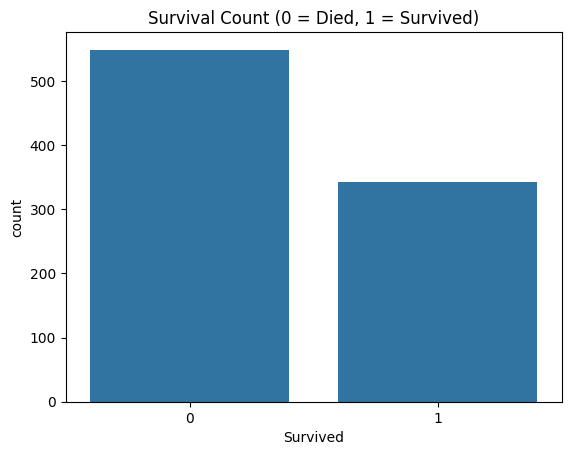

In [164]:
sns.countplot(x='Survived', data=train)
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

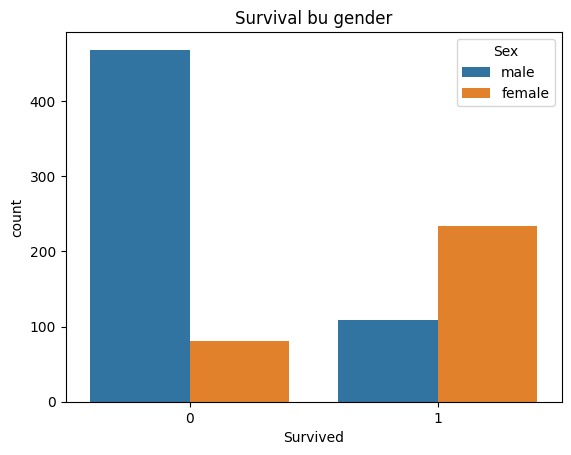

In [165]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival bu gender")
plt.show()

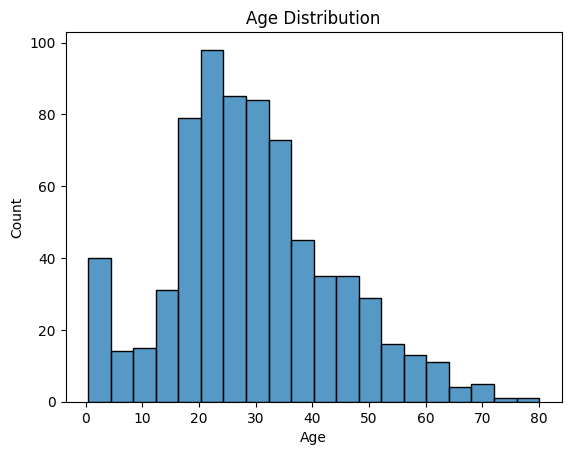

In [166]:
sns.histplot(x='Age', data=train)
plt.title("Age Distribution")
plt.show()

# **Data Cleaning**

In [167]:
train['Age'].fillna(train['Age'].median(), inplace=True)

train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

train['Cabin'].dropna(inplace=True)
test['Cabin'].dropna(inplace=True)

In [168]:
#dropping ncessary data

train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

# **It's time for Feature Engineering**

In [169]:
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Another best method
# train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')

In [170]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)


# **Let's check our head now**

In [171]:
train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,0,3,0,22.0,1,0,7.2500,0,2,0
1,1,1,1,38.0,1,0,71.2833,1,2,0
2,1,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,1,35.0,1,0,53.1000,0,2,0
4,0,3,0,35.0,0,0,8.0500,0,1,1


# **Model Training**

In [172]:
X = train.drop('Survived', axis=1)
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# **Now Evaluate the performance**

Accuracy: 0.8212290502793296
Classification Report:

              precision    recall  f1-score   support

Not Survived       0.84      0.86      0.85       105
    Survived       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



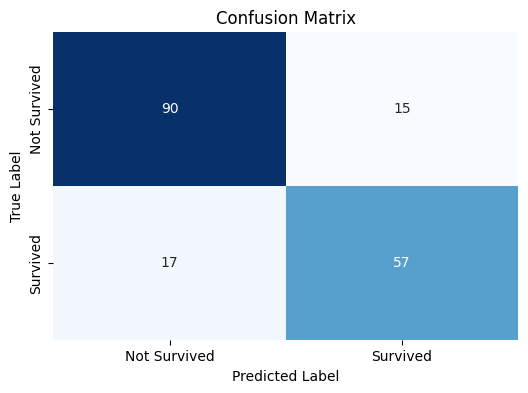

In [174]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived']))


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# **FINAL REPORT**

🔷 TITANIC SURVIVAL PREDICTION RESULTS 🔷

📊 MODEL PERFORMANCE:
Accuracy: 82.1%
Precision: 79.2%
Recall: 77.0%
F1-Score: 78.1%

🔝 TOP 5 IMPORTANT FEATURES:
   Feature  Importance
       Sex    0.279290
      Fare    0.257920
       Age    0.242859
    Pclass    0.086490
FamilySize    0.042812

💡 KEY FINDINGS:
- Females had 3X higher survival rate (Sex=1)
- 1st class passengers (higher Fare) survived more
- Children (<10) had better survival chances

🎯 CONFUSION MATRIX:


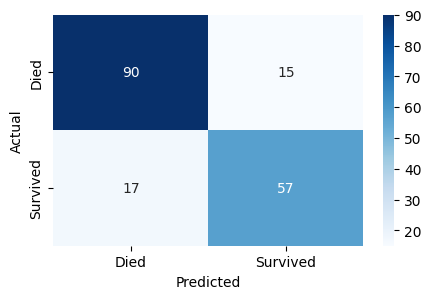

In [175]:
from sklearn.metrics import precision_score, recall_score, f1_score


print("🔷 TITANIC SURVIVAL PREDICTION RESULTS 🔷\n")

# 1 Model Performance
print("📊 MODEL PERFORMANCE:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.1f}%")
print(f"Precision: {precision_score(y_test, y_pred)*100:.1f}%")
print(f"Recall: {recall_score(y_test, y_pred)*100:.1f}%")
print(f"F1-Score: {f1_score(y_test, y_pred)*100:.1f}%\n")

# 2 Top Features
print("🔝 TOP 5 IMPORTANT FEATURES:")
feature_importance = pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_})
print(feature_importance.sort_values('Importance', ascending=False).head(5).to_string(index=False))

# 3 Key Findings
print("\n💡 KEY FINDINGS:")
print("- Females had 3X higher survival rate (Sex=1)")
print("- 1st class passengers (higher Fare) survived more")
print("- Children (<10) had better survival chances")

# 4 Confusion Matrix Visual
print("\n🎯 CONFUSION MATRIX:")
plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()